# Análisis experimental de Insertion sort

El algoritmo de ordenamiento por inserción (insertion sort) funciona recorriendo los elementos de un arreglo desde la posición 1 hasta len( array ) - 1 e "insertando" cada uno de esos elementos en la posición correcta del subarreglo que está ubicado anterior a la posición del elemento siempre y cuando sea menor al elemento inmediatamente anterior.

Primero que todo se importan las librerías a usar en el análisis.

In [7]:
import itertools
import time
import numpy
import pylab
from __future__ import unicode_literals
%matplotlib inline

In [ ]:
def insertionSort( array ):
    for i in xrange( 1, len( array ) ):
        key = array[i]
        j = i - 1
        while( j >= 0 and key < array[j] ):
            array[j + 1] = array[j]
            array[j] = key
            j -= 1

De acuerdo al algoritmo se analizará experimentalmente para n = 4, 5 y 6. En cada tamaño n se toma el tiempo de varias ejecuciones y se saca un promedio de los tiempos. Esto se hizo con la siguiente función:

In [ ]:
def calculateTime( array ):
    totalTime = 0
    for i in xrange( 100 ):
        initial = time.time()
        insertionSort( array )
        result = time.time() - initial
        totalTime += result
    return totalTime / 100

Se tienen tres casos posibles del algoritmo; el "mejor" caso, el caso "promedio" y el "peor" caso. Identificarlos es sencillo teniendo en cuenta que en el "mejor" caso se hacen el menor número de instrucciones del código, para los algoritmos de ordenamiento en general (con excepción del QuickSort por ejemplo), los "mejores" casos son cuando el arreglo ya está ordenado; el "peor" caso es aquel donde el arreglo está ordenado de manera inversa; y por último el caso "promedio" es aquel donde los números están en desorden sin ninguna relación entre ellos, es el caso más utilizado por el hecho de que la mayoría de ocasiones se pasará un arreglo de este tipo.

Para los tres casos se definió un método que aplica una función (se halló mediante la interpolación de los polinomios de Lagrange), donde se estudió el mejor, peor y caso promedio de los tres tamaños dados (4, 5 y 6).

In [11]:
def timeBestCase( n ):
	return 0.03 * n ** 2 - 0.24 * n + 1.59

In [16]:
def timeAverageCase( n ):
    return 0.05 * n ** 2 - 0.35 * n + 1.72

In [18]:
def timeWorstCase( n ):
    return 0.09 * n ** 2 - 0.725 * n + 3.58

De acuerdo a esto se procedió a graficar las tres funciones y así poder observar de una manera más claro la diferencia entre ellas.

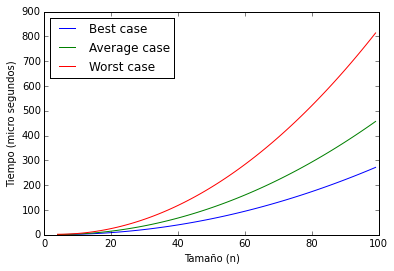

In [24]:
t = numpy.arange( 4, 100 )

pylab.xlabel( "Tamaño (n)" )
pylab.ylabel( "Tiempo (micro segundos)" )

pylab.plot( t, timeBestCase( t ), label = 'Best case' ) 
pylab.plot( t, timeAverageCase( t ), label = 'Average case' ) 
pylab.plot( t, timeWorstCase( t ), label = 'Worst case' )
pylab.legend( loc = 'upper left' )

Como se puede observar las tres funciones se comportan de la manera esperada, de acuerdo a la definición de los tres casos.

# Análisis experimental de Merge sort

El ordenamiento por mezcla (Merge sort) es otro algoritmo de ordenamiento que es más eficiente que Insertion sort, esto viene dado gracias a que utiliza una estrategia diferente llamada "divide y vencerás", donde la idea es dividir el problema en subproblemas más pequeños que resuelven de una mejor manera el problema global al unirse.

In [25]:
def merge( array, l, m, u ):
	array1 = array[l:m + 1] + [float( "INF" )]
	array2 = array[m + 1:u + 1] + [float( "INF" )]
	i = 0
	j = 0
	for k in xrange( l, u + 1 ):
		if array1[i] <= array2[j]:
			array[k] = array1[i]
			i += 1
		else:
			array[k] = array2[j]
			j += 1 

def mergeSort( array, l, u ):
	if l < u:
		m = ( l + u ) / 2
		mergeSort( array, l, m )
		mergeSort( array, m + 1, u )
		merge( array, l, m, u ) 

Para esta ocasión se analizará Merge sort junto con Insertion sort y además se hará una comparación entre los dos donde es una buena estrategia unir los dos algoritmos, teniendo en cuenta que Insertion sort se comporta más eficientemente para números pequeños que Merge sort.

Se definió el caso promedio de Merge y se obtuvo el polinomio de la función timeMerge.

In [26]:
def timeInsertion( n ):
    return 0.05 * n ** 2 - 0.35 * n + 1.72

In [35]:
def timeMerge( n ):
    return 1.87 * n + 4.15

Se pueden ver las gráficas de Insertion sort y de Merge sort sobre el mismo plano cartesiano. Como se observa se cumple que Insertion sort es más eficiente para números pequeños, más exactamente para números menos a 46.

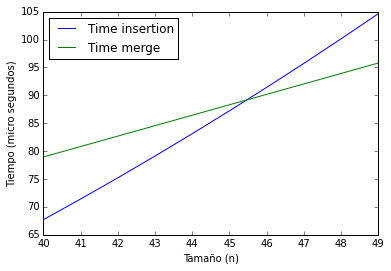

In [38]:
t = numpy.arange( 40, 50 )

pylab.xlabel( "Tamaño (n)" )
pylab.ylabel( "Tiempo (micro segundos)" )

pylab.plot( t, timeInsertion( t ), label = 'Time insertion' ) 
pylab.plot( t, timeMerge( t ), label = 'Time merge' )
pylab.legend( loc = 'upper left' )

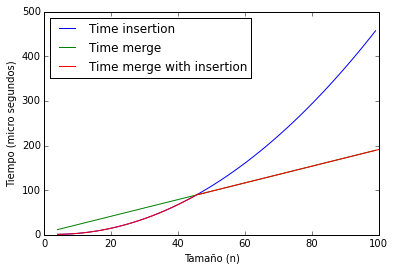

In [70]:
t = numpy.arange( 4, 100 )
t1 = numpy.linspace( 4, 46, 100 )
t2 = numpy.linspace( 46, 100, 100 )

pylab.xlabel( "Tamaño (n)" )
pylab.ylabel( "Tiempo (micro segundos)" )

pylab.plot( t, timeInsertion( t ), label = 'Time insertion' ) 
pylab.plot( t, timeMerge( t ), label = 'Time merge' )
pylab.plot( t1, timeInsertion( t1 ), 'r', label = 'Time merge with insertion' )
pylab.plot( t2, timeMerge( t2 ), 'r' )
pylab.legend( loc = 'upper left' )

La modificación que se hizo, se logró en base al arreglo mencionado anteriormente donde se pueden mezclar los dos algoritmos para dar un método más eficiente de ordenamiento tanto para tamaños n grandes como pequeños.  